# Part 1. Pandas

In [25]:
#Download data from google disk if you work in Colab, insert your path to the file 
# "rrna_annotation.gff" and "alignment.bed"!!!

#!gdown --id 1fbxXxumB1rDNTLkAfhajSLJcqwGBdwG7 # rrna_annotation.gff
#!gdown --id 1UaQ51vAi8CFzISJYsJKzdH4TaG5ndWzo # alignment.bed

path_rrna_annotation = 'C://jupyter//rrna_annotation.gff'
path_alignment = 'C://jupyter//alignment.bed'

In [26]:
import pandas as pd

In [27]:
#function to read a gff file
def read_gff(gff_file):
    gff_table = pd.read_csv(
        gff_file, 
        sep="\t", 
        header=None,
        comment="#", 
        names=("chromosome", "source", "type", "start",
               "end", "score", "strand", "phase", "attribute"))
    return(gff_table)
gff_table = read_gff(path_rrna_annotation)

#leave only rRNA type data (16S, 23S, 5S)
gff_table['attribute'] = gff_table['attribute'].str[5:8].str.replace(r'_','')
gff_table

,chromosome,source,type,start,end,score,strand,phase,attribute
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [28]:
#function to read a bed file
def read_bed6(bed_file):
    bed_table = pd.read_csv(
        bed_file, 
        sep='\t', 
        comment='#', 
        header=None, 
        names = ("chromosome", "start", "end", "name", "score", "strand"))
    return(bed_table)
bed_table = read_bed6(path_alignment)
bed_table

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [29]:
# table showing for each chromosome the number of rRNAs of each type

table_for_rRNA = gff_table.groupby(['chromosome', 'attribute'])["attribute"].count().unstack().fillna(0)
a = table_for_rRNA.index.to_series().str.rsplit('_').str[-1].astype(int).sort_values()
table_for_rRNA = table_for_rRNA.reindex(index=a.index)
table_for_rRNA

attribute,16S,23S,5S
chromosome,,,
Reference_1,2.0,2.0,2.0
Reference_2,5.0,5.0,5.0
Reference_3,2.0,2.0,2.0
Reference_4,8.0,10.0,6.0
Reference_5,6.0,6.0,6.0
Reference_6,2.0,2.0,2.0
Reference_7,9.0,8.0,8.0
Reference_8,2.0,2.0,0.0
Reference_9,6.0,6.0,6.0


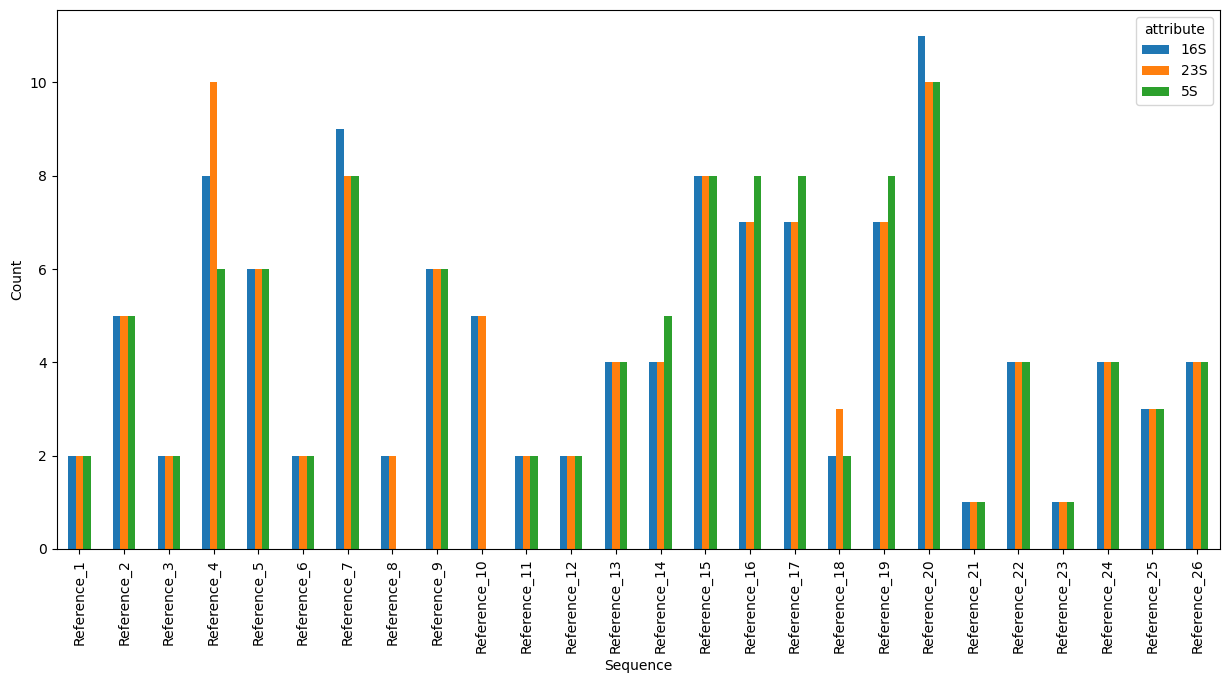

In [30]:
#visualization
table_for_rRNA.plot.bar(xlabel='Sequence', ylabel='Count', figsize=(15, 7));

In [31]:
#table containing the initial records of the rRNAs that are fully included in the assembly, 
# as well as a record of the contig in which this rRNA is included

merge_table = pd.merge(gff_table,bed_table, on="chromosome", how="outer")
merge_table[(merge_table['start_x'] >= merge_table['start_y']) & (merge_table['end_x'] <= merge_table['end_y'])]

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attribute,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


## Part 2. Matplotlib

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

In [33]:
#Download data from google disk if you work in Colab, insert your path to the file "diffexpr_data.tsv.gz"!!!

#!gdown --id 1TcZWPE2vd4M7JAMHLp5bQHvyg08sK1qY
diffexpr = 'C://jupyter//diffexpr_data.tsv.gz'

In [34]:
diffexpr_data = pd.read_csv(diffexpr, 
                           sep='\t', 
                           comment='#')
diffexpr_data

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


In [36]:
#function to determine the gene category depending on the p-value and log "fold change"
def label_maker(p, fold):
    if fold < 0:
        if p < 0.05:
            return 'Significantly downregulated'
        else:
            return 'Non-significantly downregulated'
    else:
        if p >= 0.05:
            return 'Non-significantly upregulated'
        else:
            return 'Significantly upregulated'
#create a new column to display the category
diffexpr_data['Lable'] = diffexpr_data.apply(lambda x: label_maker(x['pval_corr'], x['logFC']), axis=1)

In [37]:
#select the data with the min log "fold change" and p-value > 0.05
Sd = diffexpr_data[diffexpr_data['Lable'] == 'Significantly downregulated']
Sd = Sd.sort_values(by='logFC')
#select the data with the max log "fold change" and p-value > 0.05
Su = diffexpr_data[diffexpr_data['Lable'] == 'Significantly upregulated']
Su = Su.sort_values(by='logFC', ascending=False)

In [38]:
#Set boundaries for the X-axis
x_min = round(diffexpr_data['logFC'].min(), 1) - 1
x_max = round(diffexpr_data['logFC'].max(), 1) + 1.5

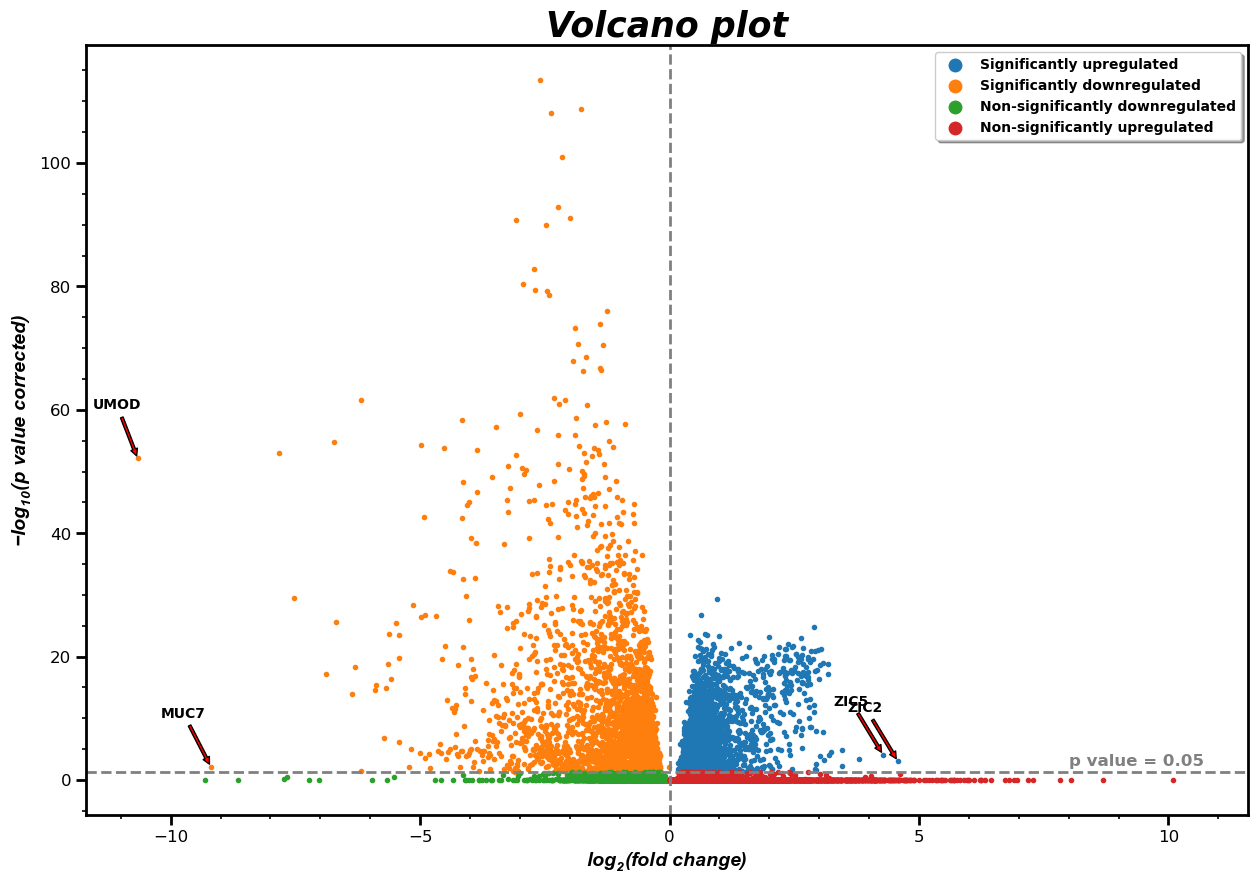

In [40]:
#set graph size
fig, ax = plt.subplots(figsize=(15, 10))

#install the font
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:italic:bold'

#add title and lables
plt.title('Volcano plot', weight='bold', style='italic', size=25)
plt.xlabel(r'$\mathbf{\bf{log_2(fold\ change)}}$', size=14)
plt.ylabel(r"$\mathbf{-log_{10}(p \ value \ corrected)}$", size=14)

#divide the data into 4 groups and visualize
label_names = list(set(diffexpr_data['Lable']))
for i in range(4):
  l = diffexpr_data[diffexpr_data['Lable'] == label_names[i]]
  plt.scatter(l['logFC'], l['log_pval'], label=label_names[i], s=9)

#add legend
legend_properties = {'weight':'bold'} #add a bold typeface
plt.legend(shadow=True, markerscale=3, prop=legend_properties)

#set the boundaries of the X-axis
plt.xlim(x_min, x_max)
 
#add ticks on X and Y lable
fig.gca().yaxis.set_minor_locator(ticker.MultipleLocator(5))
fig.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.tick_params(which='major', width=2, length=7, labelsize=12)
ax.tick_params(which='minor', width=1.2, length=3)
#add a dashed gray line
ax.axhline(y=-np.log10(0.05), linestyle= '--', color='gray', linewidth=2)
ax.axvline(x=0, linestyle= '--', color='gray', linewidth=2)

#change the border width 
for axis in ['top','bottom','left','right']:
    fig.gca().spines[axis].set_linewidth(2)

#add the phrase "p value"
ax.annotate('p value = 0.05',
            xy=(770, 85), xycoords='figure points', color = 'gray', weight='semibold', size = 12)

#add arrows and signatures for the top 2 genes that significantly decreased expression and the top 2 genes that significantly increased expression
ax.annotate(Sd.iloc[0][0], xy=(Sd.iloc[0][1], Sd.iloc[0][4]), xytext=(Sd.iloc[0][1] - 0.9, Sd.iloc[0][4] + 8),
            arrowprops=dict(arrowstyle="simple", facecolor='red'), weight='semibold', size=10)
ax.annotate(Sd.iloc[1][0], xy=(Sd.iloc[1][1], Sd.iloc[1][4]), xytext=(Sd.iloc[1][1] - 1, Sd.iloc[1][4] + 8),
            arrowprops=dict(arrowstyle="simple", facecolor='red'), weight='semibold', size=10)
ax.annotate(Su.iloc[0][0], xy=(Su.iloc[0][1], Su.iloc[0][4]), xytext=(Su.iloc[0][1] - 1, Su.iloc[0][4] + 8),
            arrowprops=dict(arrowstyle="simple", facecolor='red'), weight='semibold', size=10)
ax.annotate(Su.iloc[1][0], xy=(Su.iloc[1][1], Su.iloc[1][4]), xytext=(Su.iloc[1][1] - 1, Su.iloc[1][4] + 8),
            arrowprops=dict(arrowstyle="simple", facecolor='red'), weight='semibold', size=10);